In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the dataset
data = pd.read_csv('Iris.csv')

In [4]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
# Check column names and data types
print("\nColumn Names and Data Types:")
print(data.dtypes)


Column Names and Data Types:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [6]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [8]:
# Class distribution
print("\nClass Distribution:")
print(data['Species'].value_counts())


Class Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


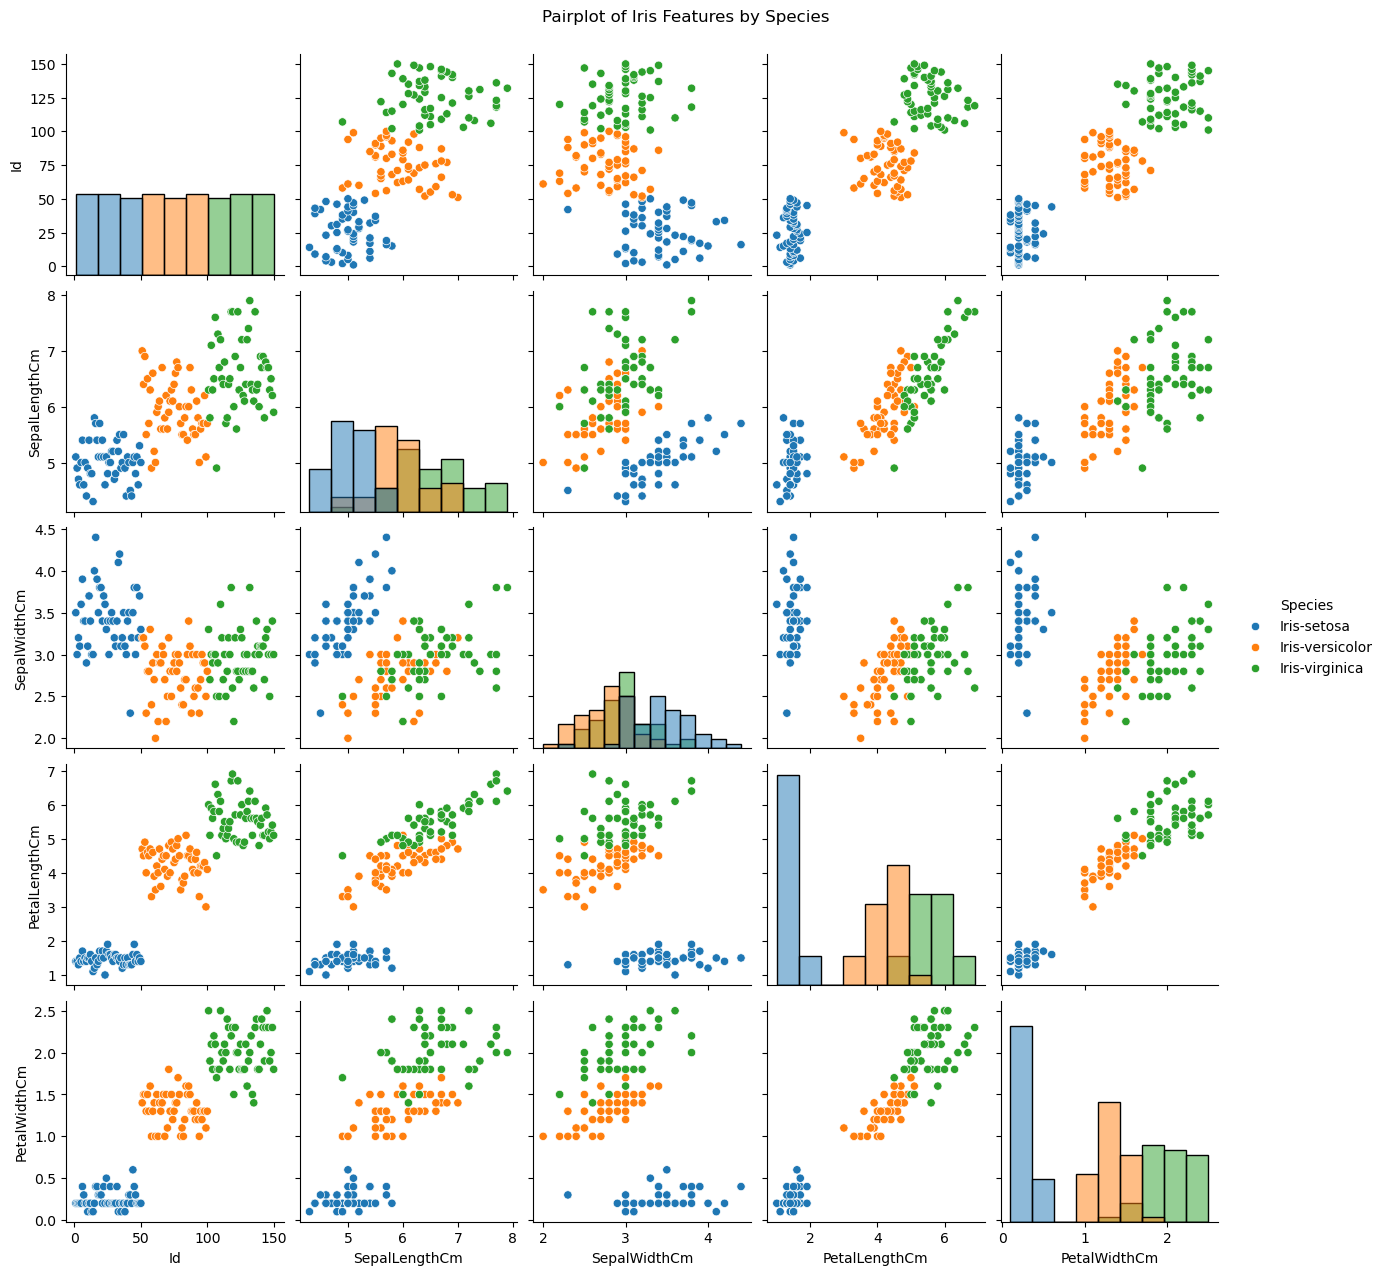

In [10]:
# Pairplot to visualize feature relationships
sns.pairplot(data, hue='Species', diag_kind='hist')
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()

Selected Features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Number of features: 4


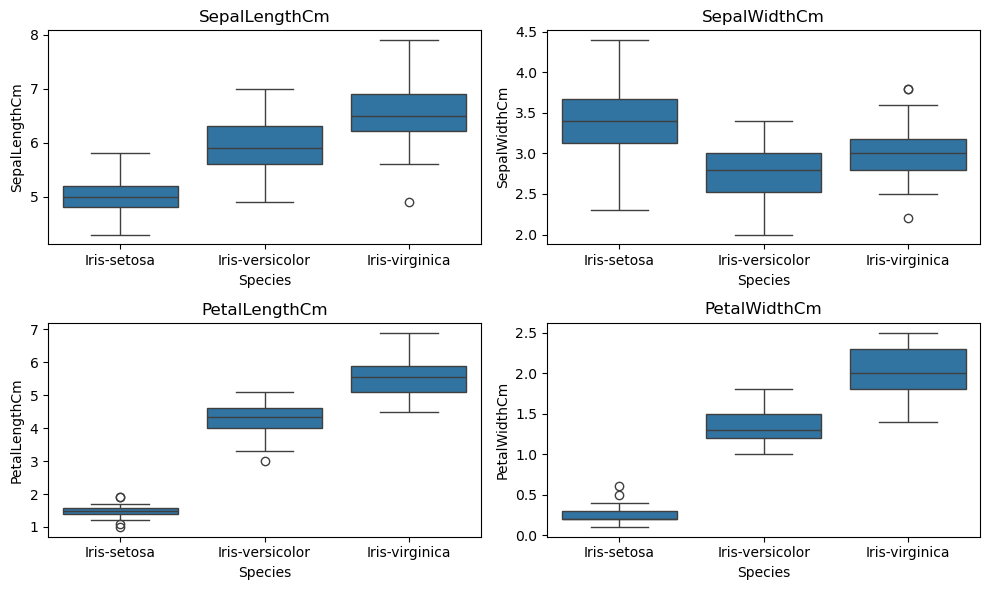

In [16]:
# Boxplot for feature distributions
features = [col for col in data.columns if col not in ['Species','Id']]
print("Selected Features:", features)
print(f"Number of features: {len(features)}")
plt.figure(figsize=(10, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=feature, data=data)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [17]:
# Split features and target
X = data.drop('Species', axis=1)
y = data['Species']

# Encode target if it's categorical (string labels)
if y.dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("Encoded species labels:", dict(zip(le.classes_, range(len(le.classes_)))))

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Encoded species labels: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
Training set size: (120, 5)
Test set size: (30, 5)


In [18]:
# Initialize and train the model
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

Test Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



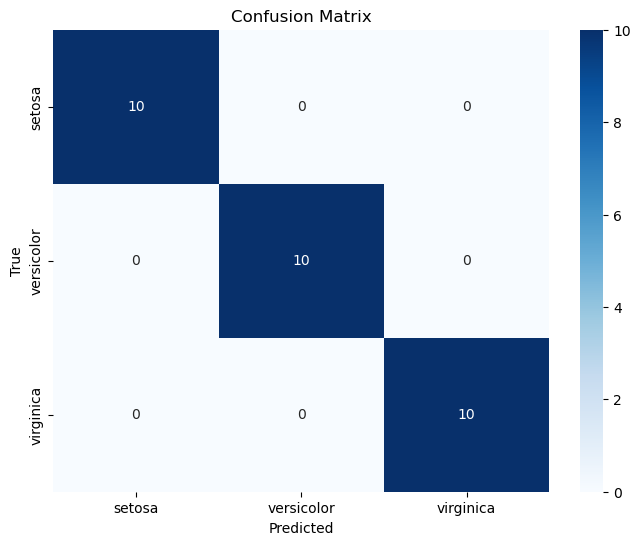

In [19]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica']))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['setosa', 'versicolor', 'virginica'], 
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate
print("\nDecision Tree Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_dt)))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['setosa', 'versicolor', 'virginica']))


Decision Tree Accuracy: 1.0000

Decision Tree Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

